In [1]:
%matplotlib inline
import pandas as pd
import json
from pprint import pprint
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import datetime
from plotly import tools
from pandas import Grouper
plotly.tools.set_credentials_file(username='niuguy',                                              
                                  api_key='z3NhXUhBnpf5hAc3v3yd')

## Walk through all the data 

In [2]:
def load_json(file_name):
    with open(file_name) as file:
        j_object = json.load(file)        
    return j_object, pd.DataFrame(j_object)    

In [3]:
treat, pd_treat = load_json('data/20396154_treatments__to_2018-12-20.json')
treat_2, pd_treat_2 = load_json('data/85653830-treatments.json')

In [4]:
profile, pd_profile = load_json('data/20396154_profile__to_2018-12-20.json')

In [5]:
entries, pd_entries = load_json('data/20396154_entries__to_2018-12-20.json')
entries_2, pd_entries_2 = load_json('data/85653830-entries.json')

In [6]:
device, pd_device = load_json('data/20396154_devicestatus__to_2018-12-20.json')

### Refactoring
---

In [8]:
# transfer date formate
pd_entries['datetime'] = pd.to_datetime(pd_entries['dateString'], utc=True)

In [9]:
# set index as date
pd_entries.set_index('datetime')
pd_entries.head()

,_id,date,dateString,device,direction,sgv,trend,type,datetime
0,5c1ab0758e5ee1609e4701a3,1545252904000,2018-12-19T20:55:04.000Z,share2,Flat,137,4,sgv,2018-12-19 20:55:04+00:00
1,5c1aaf498e5ee1609e46fbb5,1545252604000,2018-12-19T20:50:04.000Z,share2,Flat,143,4,sgv,2018-12-19 20:50:04+00:00
2,5c1aae1d8e5ee1609e46f5e9,1545252304000,2018-12-19T20:45:04.000Z,share2,Flat,148,4,sgv,2018-12-19 20:45:04+00:00
3,5c1aacf18e5ee1609e46efe6,1545252004000,2018-12-19T20:40:04.000Z,share2,Flat,149,4,sgv,2018-12-19 20:40:04+00:00
4,5c1aabc58e5ee1609e46ea03,1545251704000,2018-12-19T20:35:04.000Z,share2,Flat,147,4,sgv,2018-12-19 20:35:04+00:00


In [13]:
pd_entries['sgv'].describe()

count    32418.000000
mean       135.206521
std         43.014202
min          1.000000
25%        102.000000
50%        128.000000
75%        163.000000
max        323.000000
Name: sgv, dtype: float64

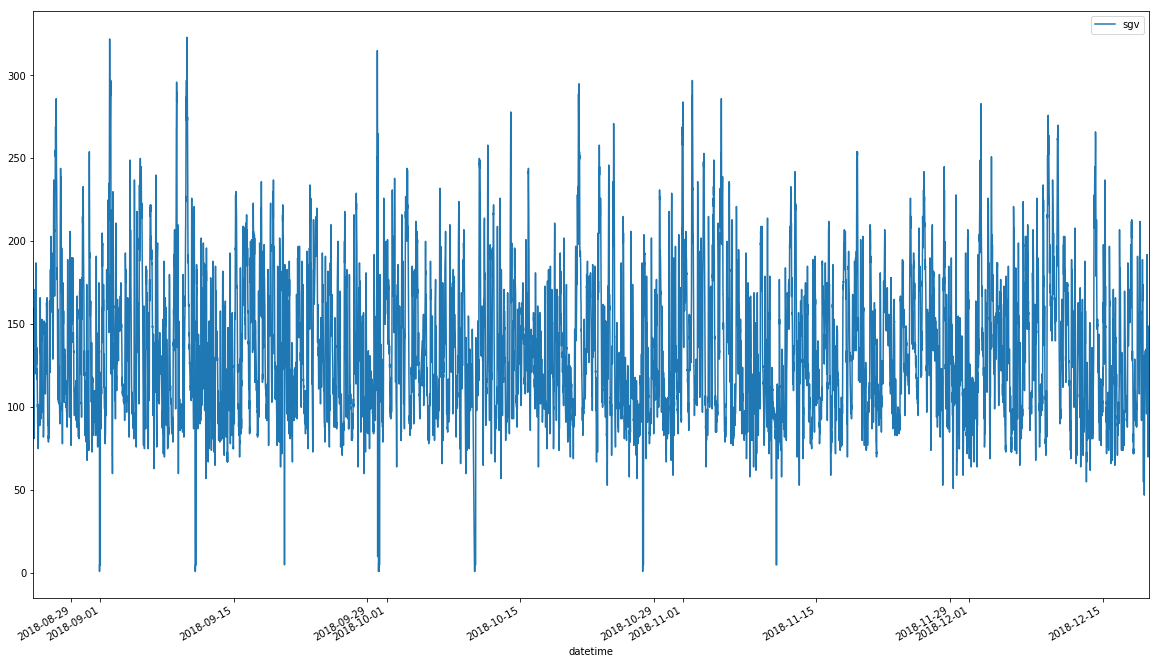

In [12]:
pd_entries.plot.line(x='datetime', y='sgv', figsize=(20, 12))

---

In [56]:
# convert 
pd_treat['date'] = pd.to_datetime(pd_treat['timestamp'],utc=True)
pd_treat_2['date'] = pd.to_datetime(pd_treat_2['timestamp'], utc=True)

In [114]:
mask = (pd_treat['date']> '2018-12-17') & (pd_treat['date']<='2018-12-18')
pd_treat_selected = pd_treat.loc[mask]
mask_2 = (pd_treat_2['date']> '2017-08-24') & (pd_treat_2['date']<='2017-08-25')
pd_treat_selected_2 = pd_treat_2.loc[mask_2]

In [116]:
pd_treat_selected_2['date'].head()

24   2017-08-24 23:03:46+00:00
25   2017-08-24 23:02:42+00:00
26   2017-08-24 22:59:13+00:00
27   2017-08-24 22:57:08+00:00
28   2017-08-24 22:47:56+00:00
Name: date, dtype: datetime64[ns, UTC]

In [121]:
pd_temp_basal = pd_treat_selected[pd_treat_selected['eventType']=='Temp Basal']
pd_temp_basal_2 = pd_treat_selected_2[pd_treat_selected_2['eventType']=='Temp Basal']

In [100]:
pd_entries['datetime'] = pd.to_datetime(pd_entries['dateString'])

mask = (pd_entries['datetime']> '2018-12-17') & (pd_entries['datetime']<='2018-12-18')

pd_entries_selected = pd_entries.loc[mask]


In [117]:
pd_entries_2['datetime'] = pd.to_datetime(pd_entries_2['dateString'], utc=True)

mask_2 = (pd_entries_2['datetime']> '2017-08-24') & (pd_entries_2['datetime']<='2017-08-25')

pd_entries_selected_2 = pd_entries_2.loc[mask_2]


### Look at the first person, and try to figure out its routine

In [146]:
mask= (pd_entries['datetime']> '2018-12-08') & (pd_entries['datetime']<='2018-12-18')

pd_entries_selected = pd_entries[mask]

trace_entries = go.Scatter(x=pd_entries_selected.datetime, y = pd_entries_selected.sgv)

data = [trace_entries]

py.iplot(data, filename='bg 1 month')

/usr/local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [168]:
from pandas import TimeGrouper
from matplotlib import pyplot
import seaborn
import matplotlib.pyplot as plt


# pd_entries_selected.set_index('datetime')
# fig, ax = plt.subplots(figsize=(12,5))
# seaborn.boxplot(pd_entries_selected.index.dayofyear, ts, ax=ax)




daily_groups = pd_entries_selected.groupby(Grouper(key='datetime', freq='1d'))
day_sgvs = {}
data = []
for name,group in daily_groups:
#     print(group['sgv'].values)
    day_sgvs[name] = group['sgv'].values
    data.append(go.Box( y=group['sgv'].values, name=str(name), showlegend=False ) )


    
# day_sgvs_df = pd.DataFrame.from_dict(day_sgvs, orient = 'index')

# day_sgvs_df.head()

url = py.plot(data, filename='pandas-box-plot')


In [169]:
# Compare two people with their BG and Temp Basals

trace_entries = go.Scatter(x=pd_entries_selected.datetime, y = pd_entries_selected.sgv)
trace_entries_2 = go.Scatter(x=pd_entries_selected_2.datetime, y = pd_entries_selected_2.sgv)
trace_basal = go.Scatter(x=pd_temp_basal.date, y = pd_temp_basal.absolute)
trace_basal_2 = go.Scatter(x=pd_temp_basal_2.date, y = pd_temp_basal_2.absolute)

# layout = go.Layout(title='BG&Events&Temp Basal', xaxis=dict(title='Date'))
fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('blood glucose', 'temp basal'))

# fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('blood glucose_1','bg_2','tb_1','tb_2'))
fig.append_trace(trace_entries, 1, 1)
# fig.append_trace(trace_entries_2, 1, 2)

# fig.append_trace(trace_event, 2, 1)
fig.append_trace(trace_basal, 2, 1)
# fig.append_trace(trace_basal_2, 2, 2)


fig['layout'].update(height=900, width=1200, title='Blood Glucose & Temp Basal')

# fig = go.Figure(data=[trace_entries, trace_event], layout=layout)
py.iplot(fig, sharing='public')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



## Predict Result

In [27]:
import _pickle as pickle
results = pickle.load(open('results/predict_1552658605.6576672.pkl', 'rb'))

In [28]:
target_entries = pd_entries[pd_entries['datetime']>'2018-12-01 01:00:00'].sort_values(by=['datetime'], ascending = True)
# print(target_entries.sort_values(by=['datetime'], ascending = True).head())

In [29]:
print(len(target_entries.datetime))
print(target_entries.datetime[0])
print(results[0])

5230
2018-12-19 20:55:04+00:00
76


In [31]:
trace_target_entries = go.Scatter(x=target_entries.datetime[:288], y = target_entries.sgv[:288], name = 'true')
trace_pred_entries = go.Scatter(x=target_entries.datetime[:288], y = results[:288], name = 'predict')
data = [trace_target_entries, trace_pred_entries]
py.iplot(data, filename='line-mode')

## Profile&Device

In [49]:
profile[:5]

[{'created_at': '2018-12-20T06:33:08Z',
  'enteredBy': 'loop',
  'mills': '0',
  'startDate': '2018-12-20T06:33:08Z',
  'loopSettings': {'dosingEnabled': True,
   'minimumBGGuard': {'units': 'mg/dL', 'value': 75},
   'integralRetrospectiveCorrectionEnabled': True,
   'retrospectiveCorrectionEnabled': True,
   'maximumBolus': 6,
   'maximumBasalRatePerHour': 4,
   'version': 1,
   'cgmSource': {'version': 1, 'transmitterID': '80APA2', 'type': 'g5'},
   'workoutTargets': {'workout': '150.0 - 170.0',
    'remoteTempTarget': '145.0 - 155.0',
    'preMeal': '70.0 - 75.0'}},
  '_id': '5c1b37a5ea3a6000044dc94b',
  'units': 'mg/dL',
  'store': {'Default': {'basal': [{'timeAsSeconds': 0,
      'time': '00:00',
      'value': 0.75},
     {'timeAsSeconds': 18000, 'time': '05:00', 'value': 0.85},
     {'timeAsSeconds': 32400, 'time': '09:00', 'value': 0.95},
     {'timeAsSeconds': 50400, 'time': '14:00', 'value': 0.6},
     {'timeAsSeconds': 54000, 'time': '15:00', 'value': 0.55},
     {'timeAsSec

In [50]:
device[:5]

[{'_id': '5c1af914ea3a6000044dc8c3',
  'created_at': '2018-12-19T23:55:48Z',
  'device': 'V9N08H',
  'loop': {'timestamp': '2018-12-19T23:55:48Z',
   'recommendedBolus': 0,
   'name': 'BGTargets (95:105) | EvBG 57 | Loop',
   'cob': {'cob': 1.2488588438502402, 'timestamp': '2018-12-19T23:55:00Z'},
   'enacted': {'rate': 0,
    'timestamp': '2018-12-19T23:55:47Z',
    'duration': 30,
    'received': True},
   'iob': {'timestamp': '2018-12-19T23:55:00Z', 'iob': -0.21436700438772152},
   'version': '1.9.2-katie',
   'predicted': {'startDate': '2018-12-19T23:55:06Z',
    'values': [76,
     78,
     79,
     78,
     75,
     72,
     69,
     67,
     65,
     63,
     61,
     59,
     58,
     57,
     56,
     55,
     54,
     54,
     53,
     52,
     52,
     52,
     52,
     51,
     51,
     51,
     51,
     51,
     51,
     51,
     51,
     51,
     52,
     52,
     52,
     52,
     53,
     53,
     53,
     54,
     54,
     54,
     55,
     55,
     55,
     55,
     5